In [358]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [359]:
import pandas as pd

# CSV 불러오기"
final = pd.read_csv("/content/drive/MyDrive/25-1/공모전/final_text.csv")

In [360]:
# 태그 값 없는 열 drop
final = final.dropna(subset=['태그'])

# 1. '작성' 또는 '수정' 같은 단어 제거 → 날짜만 추출 (예: "2020-03-05 작성" → "2020-03-05")
final["작성일"] = final["작성일"].str.extract(r"(\d{4}-\d{2}-\d{2})")

# 2. datetime 형식으로 변환
final["작성일"] = pd.to_datetime(final["작성일"], errors="coerce")

In [361]:
final.isnull().sum()

,0
post_id,0
제목,56
내용,5
태그,0
작성일,20
해시태그,7227
이직_원인_후보,0
TFIDF_키워드,0
이직확률,0


In [362]:
# industry__map -> 산업
industry_map = [
        "호텔·여행·항공", "음식료·외식·프랜차이즈", "스포츠·여가·레저", "뷰티·미용",
        "콜센터·아웃소싱·기타", "정비·A/S·카센터", "렌탈·임대·리스", "서치펌·헤드헌팅",
        "시설관리·보안·경비", "웨딩·상조·이벤트"
    ,

        "은행·금융", "캐피탈·대출", "증권·보험·카드"
    ,

        "솔루션·SI·CRM·ERP", "SW", "웹에이전시", "쇼핑몰·오픈마켓·소셜커머스",
        "포털·컨텐츠·커뮤니티", "네트워크·통신서비스", "정보보안", "컴퓨터·하드웨어·장비",
        "게임·애니메이션", "모바일·APP", "IT컨설팅"
    ,

        "백화점·유통·도소매", "무역·상사", "물류·운송·배송"
    ,

        "전기·전자·제어", "반도체·디스플레이·광학", "기계·기계설비", "자동차·조선·철강·항공",
        "금속·재료·자재", "화학·에너지·환경", "섬유·의류·패션", "생활화학·화장품",
        "생활용품·소비재·기타", "목재·제지·가구", "식품가공", "농축산·어업·임업"
    ,

        "학교(초·중·고·대학·특수)", "유아·유치원·어린이집", "학원·어학원·교육원", "학습지·방문교육" # 학교 단순화
    ,

        "건축·설비·환경", "건설·시공·토목·조경", "인테리어·자재", "부동산·중개·임대"
    ,

        "의료(병원분류별)", "의료(진료과별)", "의료(간호·원무·상담)", "제약·보건·바이오", "사회복지·요양"
    ,

        "방송·케이블·프로덕션", "신문·잡지·언론사", "광고·홍보·전시", "영화·음반·배급",
        "연예·엔터테인먼트", "출판·인쇄·사진"
    ,

        "문화·공연·예술", "디자인·CAD"
    ,

        "공기업·공공기관", "협회·단체", "컨설팅·연구·조사", "회계·세무·법무",

      "사무·경영지원", "생산·제조", "학생", "AI", '인사·노무·교육', '전기·소방·통신·안전',
        '사회복지·요양보호·자원봉사',
    'IR·공시',
    '경리·회계·결산',
    '생산관리·공정관리·품질관리',
    '요리·영양·제과제빵·바리스타',
        "전자·반도체",
        "R&D"
]


# 직업
job_categories = [

        "경영·비즈니스기획", "웹기획", "마케팅기획", "PL·PM·PO", "컨설턴트", "CEO·COO·CTO", "AI기획자", "AI사업전략"
    ,

        "경영지원", "사무담당자", "총무", "사무보조", "법무담당자", "비서", "변호사", "법무사", "변리사", "노무사", "AI윤리전문가"
    ,

        "인사담당자", "HRD·HRM", "노무관리자", "잡매니저", "헤드헌터", "직업상담사"
    ,

        "회계담당자", "경리", "세무담당자", "재무담당자", "감사IR·공시", "회계사", "세무사", "관세사"
    ,

        "AE(광고기획자)", "브랜드마케터", "퍼포먼스마케터", "CRM마케터", "온라인마케터", "콘텐츠마케터", "홍보", "설문·리서치",
        "MD", "카피라이터", "크리에이티브디렉터", "채널관리자", "그로스해커"
    ,

        "백엔드개발자", "프론트엔드개발자", "웹개발자", "앱개발자", "시스템엔지니어", "네트워크엔지니어", "DBA", "데이터엔지니어",
        "데이터사이언티스트"
    ,

        "그래픽디자이너", "3D디자이너", "제품디자이너", "산업디자이너", "광고디자이너", "시각디자이너", "영상디자이너", "웹디자이너",
        "UI·UX디자이너", "패션디자이너", "편집디자이너", "실내디자이너", "공간디자이너", "캐릭터디자이너", "환경디자이너", "아트디렉터", "일러스트레이터"
    ,

        "물류관리자", "구매관리자", "자재관리자", "유통관리자", "무역사무원"
    ,

        "납품·배송기사", "배달기사", "수행·운전기사", "화물·중장비기사", "버스기사", "택시기사", "조종·기관사"
    ,

        "제품영업", "서비스영업", "해외영업", "광고영업", "금융영업", "법인영업", "IT·기술영업", "영업관리", "영업지원"
    ,

        "인바운드상담원", "아웃바운드상담원", "고객센터관리자"
    ,

        "금융사무", "보험설계사", "손해사정사", "심사", "은행원·텔러", "계리사", "펀드매니저", "애널리스트"
    ,

        "요리사", "조리사", "제과제빵사", "바리스타", "셰프·주방장", "카페·레스토랑매니저", "홀서버", "주방보조",
        "소믈리에·바텐더", "영양사", "식품연구원", "푸드스타일리스트"
    ,

        "설치·수리기사", "정비기사", "호텔종사자", "여행에이전트", "매장관리자", "뷰티·미용사", "애견미용·훈련",
        "안내데스크·리셉셔니스트", "경호·경비", "운영보조·매니저", "이벤트·웨딩플래너", "주차·주유원", "스타일리스트",
        "장례지도사", "가사도우미", "승무원", "플로리스트"
    ,

        "전기·전자엔지니어", "기계엔지니어", "설계엔지니어", "설비엔지니어", "반도체엔지니어", "화학엔지니어", "공정엔지니어",
        "하드웨어엔지니어", "통신엔지니어", "RF엔지니어", "필드엔지니어", "R&D·연구원", "AI로봇엔지니어"
    ,

        "생산직종사자", "생산·공정관리자", "품질관리자", "포장·가공담당자", "공장관리자", "용접사"
    ,

        "유치원·보육교사", "학교·특수학교교사", "대학교수·강사", "학원강사", "외국어강사", "기술·전문강사", "학습지·방문교사",
        "학원상담·운영", "교직원·조교", "교재개발·교수설계", "AI교육컨설턴트"
    ,

        "건축가", "건축기사", "시공기사", "전기기사", "토목기사", "시설관리자", "현장관리자", "안전관리자", "공무", "소방설비",
        "현장보조", "감리원", "도시·조경설계", "환경기사", "비파괴검사원", "공인중개사", "감정평가사", "분양매니저"
    ,

        "의사", "한의사", "간호사", "간호조무사", "약사·한약사", "의료기사", "수의사", "수의테크니션", "병원코디네이터",
        "원무행정", "기타의료종사자", "의료·약무보조", "바이오·제약연구원", "임상연구원"
    ,

        "PD·감독", "포토그래퍼", "영상편집자", "사운드엔지니어", "스태프", "출판·편집", "배급·제작자", "콘텐츠에디터",
        "크리에이터", "기자", "작가", "아나운서", "리포터·성우", "MC·쇼호스트", "모델", "연예인·매니저", "인플루언서",
        "통번역사", "큐레이터", "음반기획", "스포츠강사", "AI콘텐츠크리에이터"
    ,

        "사회복지사", "요양보호사", "환경미화원", "보건관리자", "사서", "자원봉사자", "방역·방재기사",
        "웹퍼블리셔", "소프트웨어개발자", "AI/ML엔지니어", "AI/ML", "QA", '보안엔지니어', '웹에이전시',
        '클라우드엔지니어', '게임개발자', '웹프로그래머', "데이터분석가"
]


In [363]:
import re


industry_keywords = {
    "호텔·여행·항공"        : ["호텔", "여행", "승무원", "항공", "여행에이전트"],
    "음식료·외식·프랜차이즈": ["요리", "조리", "셰프", "카페", "바리스타", "식품", "푸드", "레스토랑", "주방", "소믈리에"],
    "스포츠·여가·레저"      : ["스포츠강사", "스포츠"],
    "뷰티·미용"            : ["뷰티", "미용", "헤어", "네일", "스타일리스트", "애견미용"],
    "콜센터·아웃소싱·기타"  : ["상담원", "고객센터", "콜센터"], # 아웃소싱이 뭐지..?
    "정비·A/S·카센터"      : ["정비", "수리", "설치", "A/S"],
    "서치펌·헤드헌팅"       : ["헤드헌터", "HRD", "HRM", "잡매니저", "인사담당자", "노무관리자"],
    "회계·세무·법무"     : ["회계", "세무", "감사", "법무", "변호사", "변리사", "노무사", "관세사", "재무담당자"], # 재무담당자 추가
    "은행·금융"            : ["은행", "펀드", "애널리스트", "계리사", "금융영업"],
    "캐피탈·대출"          : ["보험설계", "손해사정", "보험"],
    "증권·보험·카드"        : ["증권", "카드"],
    "솔루션·SI·CRM·ERP"    : [ "엔지니어", "시스템", "DBA", '웹에이전시', "R&D"],
    "SW"                : ["웹퍼블리셔", "소프트웨어개발자", "백엔드", "프론트엔드", "QA", "개발자", '클라우드엔지니어', '게임개발자', '웹프로그래머'],
    "AI"                : [ "AI/ML", "AI로봇", '데이터분석가', "AI기획자"], # AI기획자 추가, AI/ML엔지니어 제거(AI/ML와 중복)
    "네트워크·통신서비스"   : ["네트워크", "통신", "RF"],
    "정보보안"             : ["보안", '보안엔지니어'],
    "게임·애니메이션"       : ["게임"],
    "모바일·APP"           : ["앱개발자", "모바일"],
    "IT컨설팅"             : ["IT컨설턴트"], # AI사업전략, AI기획자 제거
    "광고·홍보·전시"        : ["마케터", "AE", "광고", "홍보", "브랜드", "카피라이터", "마케팅기획", "웹기획"],
    "포털·컨텐츠·커뮤니티"  : ["콘텐츠", "채널관리자", "AI콘텐츠", "크리에이터", "그로스해커"],
    "물류·운송·배송"        : ["물류", "배송", "배달", "운전", "화물", "택시", "버스", "조종"],
    "백화점·유통·도소매"    : ["매장", "유통", "MD", "제품영업", "영업지원"],
    "전기·전자·제어"        : ["전기", "전자"],
    "반도체·디스플레이·광학": ["반도체"],
    "기계·기계설비"        : ["기계", "설비", "용접", "필드엔지니어"],
    "화학·에너지·환경"      : ["화학", "환경", "방역"],
    "컴퓨터·하드웨어·장비"  : ["하드웨어"],
    "학교(초·중·고·대학·특수)" : ["학교·", "교사", "교직원", "교수", "조교"],
    "유아·유치원·어린이집" : ["유치원", "보육"],
    "학원·어학원·교육원"    : ["학원", "강사", "AI교육컨설턴트"],
    "학습지·방문교육"       : ["학습지", "방문교사"],
    "건축·설비·환경"    : ["건축"],
    "건설·시공·토목·조경"    : ["시공", "토목", "현장", "감리", "조경", "비파괴", "품질관리자"], # 품질관리자 추가
    "부동산·중개·임대"      : ["중개사", "감정평가", "분양"],
    "의료(진료과별)"        : ["의사", "한의사", "수의"],
    "의료(간호·원무·상담)"   : ["간호", "코디네이터", "원무", "조무사", "의료보조"],
    "제약·보건·바이오"      : ["약사", "바이오", "임상", "보건", "제약연구원"],
    "사회복지·요양"        : ["복지사", "요양", "자원봉사"],
    "방송·케이블·프로덕션"  : ["PD", "영상", "사운드", "스태프"],
    "신문·잡지·언론사"      : ["기자", "아나운서", "리포터"],
    "영화·음반·배급"        : ["영화", "음반", "배급"],
    "연예·엔터테인먼트"      : ["연예", "모델", "MC", "쇼호스트", "인플루언서"],
    "출판·인쇄·사진"        : ["출판", "포토", "편집", "사진"],
    "문화·공연·예술"        : ["큐레이터", "공연", "예술"],
    "디자인·CAD"           : ["디자이너", "디자인", "일러스트", "아트", "CAD"],
    "사무·경영지원"      : ["사무담당자", "사무보조", "경영·비즈니스기획", "경영지원", "총무", "AI사업전략"], # AI사업전략 추가
    "생산·제조"          : ["생산직종사자", "생산·공정관리자"], # QA, 품질관리자 키워드 제거
    "무역·상사"          : ["해외영업", "무역사무원"],
    "물류·운송·배송"           : ["자재관리자", "구매관리자"],
    "전기·소방·통신·안전" : ["소방설비"],
}


# 기업 -> 산업 변경하는 룰
기업_to_산업 = {
    "삼성전자㈜": "전자·반도체",
    "삼성카드(주)": "증권·보험·카드",
    "LG유플러스": "네트워크·통신서비스",
    "하이브웍스": "연예·엔터테인먼트",
    "신한카드": "증권·보험·카드",
    "쿠팡(주)": "쇼핑몰·오픈마켓·소셜커머스",
    "쿠팡풀필먼트서비스 유한회사": "물류·운송·배송",
    "현대모비스㈜": "자동차·조선·철강·항공",
    "메가존클라우드㈜": "솔루션·SI·CRM·ERP",
    "한국공항공사": "호텔·여행·항공",
    "조선호텔앤리조트 조선팰리스강남": "호텔·여행·항공",
    "호식이두마리치킨": "음식료·외식·프랜차이즈",
    "한샘서비스원": "생활용품·소비재·기타",
    "JYP엔터테인먼트": "연예·엔터테인먼트",
    "㈜문화방송": "방송·케이블·프로덕션",
    "메리츠화재해상보험": "증권·보험·카드",
    "메리츠캐피탈": "캐피탈·대출",
    "하나캐피탈(주)": "캐피탈·대출",
    "오스템임플란트(주)": "의료(진료과별)",
    "(주)호텔신라": "호텔·여행·항공",
    "파이브가이즈": "음식료·외식·프랜차이즈",
    "(주)케이에프씨코리아": "음식료·외식·프랜차이즈",
    "프라다코리아 유한회사": "섬유·의류·패션",
    "샤넬코리아(유)": "섬유·의류·패션",
    "(주)우주일렉트로닉스": "전자·반도체",
    "㈜이엔에프테크놀로지": "화학·에너지·환경",
    "한미양행": "제약·보건·바이오",
    "한국남부발전(주)": "공기업·공공기관",
    "한국폴리텍": "학생",
    "잡코리아(유)": "서치펌·헤드헌팅",
    "주식회사프리죤": "물류·운송·배송",
    "지수아이앤씨": "솔루션·SI·CRM·ERP",
    "㈜프리죤에어포트서비스": "물류·운송·배송",
    "써모피셔사이언티픽코리아": "제약·보건·바이오",
    "듀오정보(주)": "서치펌·헤드헌팅",
    "㈜트랜스코스모스": "콜센터·아웃소싱·기타",
    "아이니웨딩네트웍스": "웨딩·상조·이벤트",
    "㈜케이에프씨코리아": "음식료·외식·프랜차이즈",
    "(주)비에이치": "전자·반도체",
    "(주)휴넷": "인사·노무·교육",
    "㈜아벤트코리아": "생활화학·화장품",
    "㈜신화그룹": "백화점·유통·도소매",
    "포앤티": "네트워크·통신서비스",
    "던킨도너츠 대전역사점": "음식료·외식·프랜차이즈",
    "부산정관에너지㈜": "화학·에너지·환경",
    "한국화학융합시험연구원": "화학·에너지·환경",
    "현대건설(주)": "건설·시공·토목·조경",
    "㈜서울랜드": "스포츠·여가·레저", # 호텔·여행·항공 -> 스포츠·여가·레저
    "하나투어리스트": "호텔·여행·항공",
    "해비치호텔앤드리조트(주)": "호텔·여행·항공",
    "한국과학기술원": "학교(초·중·고·대학·특수)",
    "(주)전북은행": "은행·금융",
    "㈜국제손해사정": "증권·보험·카드",
    "NH농협은행": "은행·금융",
    "(주)에스원": "시설관리·보안·경비",
    "(주)넥슨코리아": "게임·애니메이션",
    "토스씨엑스": "콜센터·아웃소싱·기타",
    "다올투자증권㈜": "증권·보험·카드",
    "동화약품㈜": "제약·보건·바이오",
    "자라리테일코리아(주)": "섬유·의류·패션",
    "코스모진여행사": "호텔·여행·항공",
    "보람상조라이프㈜": "웨딩·상조·이벤트",
    "㈜파리크라상": "음식료·외식·프랜차이즈",
    "씨아이템프러리": "콜센터·아웃소싱·기타",
    "범아해운": "물류·운송·배송",
    "㈜컴퓨존": "쇼핑몰·오픈마켓·소셜커머스",
    "㈜케이티아이에스": "IT컨설팅",
    "린데코리아㈜": "화학·에너지·환경",
    "㈜바이오니아": "제약·보건·바이오",
    "마이크로바이오틱스": "제약·보건·바이오",
    "자화전자㈜": "전자·반도체",
    "에이치디현대인프라코어㈜": "기계·기계설비",
    "에이피텍": "반도체·디스플레이·광학",
    "삼보종합물류": "물류·운송·배송",
    "(주)코텍": "전자·반도체",
    "㈜즐거운세상 인터불": "광고·홍보·전시",
    "(주)문화방송": "방송·케이블·프로덕션",
    "(주)JYP엔터테인먼트": "연예·엔터테인먼트",
    "(주)YG엔터테인먼트": "연예·엔터테인먼트",
    "㈜에스엠엔터테인먼트": "연예·엔터테인먼트",
    "미리디": "디자인·CAD",  # 인쇄·편집 플랫폼
    "㈜프로에스콤": "시설관리·보안·경비",
    "㈜발렉스특수물류": "물류·운송·배송",
    "고려신용정보㈜": "금융·카드",
    "오릭스캐피탈코리아(주)": "캐피탈·대출",
    "아지오디자인": "디자인·CAD",
    "디지털포토": "출판·인쇄·사진",
    "서울오션아쿠아리움": "호텔·여행·항공",
    "㈜빅픽처팀": "광고·홍보·전시",
    "환푸드F&B": "음식료·외식·프랜차이즈",
    "기린성형외과의원": "의료(진료과별)",
    "힘찬어린이체육교실": "유아·유치원·어린이집",
    "에스케이텔레콤씨에스티원": "네트워크·통신서비스",
    "나이스평가정보(주)": "은행·금융",
    "㈜셀디랩 (SELDI LAB Co.,Ltd.) ": "제약·보건·바이오",  # 정제 필요
    "한국니토옵티칼㈜": "반도체·디스플레이·광학",
    "㈜숲(SOOP CO., LTD.)	": "연예·엔터테인먼트",
    "(재)씨젠의료재단": "제약·보건·바이오",
    "국립암센터": "제약·보건·바이오",
    "현대캐피탈": "캐피탈·대출",
    "SK하이이엔지(주)": "기계·기계설비",
    "SK매직": "생활용품·소비재·기타",
    "(주)DB하이텍": "반도체·디스플레이·광학",
    "한국터치스크린㈜": "반도체·디스플레이·광학",
    "호텔에이치디씨㈜ 파크하얏트 서울": "호텔·여행·항공",
    "법무법인동승": "회계·세무·법무",
    "브이아이펫": "생활용품·소비재·기타",
    "국민건강보험공단": "공기업·공공기관",
    "(주)티맥스소프트": "솔루션·SI·CRM·ERP",
    "아시아나항공㈜": "호텔·여행·항공",
    "현대트랜시스": "자동차·조선·철강·항공",
    "현대자동차㈜": "자동차·조선·철강·항공",
    "현대카드㈜": "증권·보험·카드",
    "(주)한국씨티은행": "은행·금융",
    "신한카드(주)": "증권·보험·카드",
    "구찌코리아(유)": "섬유·의류·패션",
    "(주)마이리얼트립": "호텔·여행·항공",
    "(주)우아한형제들": "쇼핑몰·오픈마켓·소셜커머스",
    "LF": "섬유·의류·패션",
    "(주)한섬": "섬유·의류·패션",
    "(주)부성": "생활용품·소비재·기타",
    "로버트보쉬코리아": "기계·기계설비",
    "㈜제이에스티나": "섬유·의류·패션",
    "삼덕회계법인": "회계·세무·법무",
    "㈜에스씨에이게임부산": "게임·애니메이션",
    "신신엠앤씨": "광고·홍보·전시",
    "유민아이티": "솔루션·SI·CRM·ERP",
    "엠피인터랙티브": "게임·애니메이션",
    "유니투스㈜": "컨설팅·연구·조사",
    "㈜피케이엘": "컴퓨터·하드웨어·장비",
    "(주)니프코코리아": "기계·기계설비",
    "플랜트스페이스": "건축·설비·환경",
    "비디오브라더스": "광고·홍보·전시",
    "그래픽디자인·CG": "디자인·CAD",
    "㈜아이패밀리SC": "광고·홍보·전시",
    "㈜이카운트": "솔루션·SI·CRM·ERP",
    "무인양품㈜": "생활용품·소비재·기타",
    "태창레이저": "기계·기계설비",
    "맘보교육그룹": "학원·어학원·교육원",
    "㈜홍창업": "웨딩·상조·이벤트",
    "㈜티맥스소프트": "솔루션·SI·CRM·ERP",
    "(주)성도이엔지": "건설·시공·토목·조경",
    "쇼플레이스": "문화·공연·예술",
    "아이헤이트플라잉버그스㈜": "연예·엔터테인먼트",
    "(유)나이키코리아": "섬유·의류·패션",
    "GS리테일": "백화점·유통·도소매",
    "(주)비지에프리테일": "백화점·유통·도소매",
    "한국엘엔지": "화학·에너지·환경",
    "CJ(주)": "식품가공",  # CJ 계열 판단
    "㈜천재교과서": "출판·인쇄·사진",
    "뮤즈의원": "의료(진료과별)",
    "㈜하이브": "연예·엔터테인먼트",
    "(주)씨티씨바이오": "제약·보건·바이오",
    "디자인원준": "디자인·CAD",
    "산과들에": "식품가공",
    "한국암웨이㈜": "생활용품·소비재·기타",
    "컬리": "쇼핑몰·오픈마켓·소셜커머스",
    "테이스티나인": "식품가공",
    "삼성그룹": "전자·반도체",
    "패스트파이브㈜": "부동산·중개·임대",  # 공유오피스
    "(주)에스텍시스템": "시설관리·보안·경비",
    "쿠쿠홀딩스": "생활용품·소비재·기타",
    "㈜더본코리아": "음식료·외식·프랜차이즈",
    "기아㈜": "자동차·조선·철강·항공",
    "(주)이마트에브리데이": "백화점·유통·도소매",
    "삼성카드고객서비스(주)": "콜센터·아웃소싱·기타",
    "비엡시금융서비스": "증권·보험·카드",
    "㈜엘지헬로비전": "네트워크·통신서비스",
    "(주)알에프텍": "전자·반도체",
    "리버스아이티": "IT컨설팅",
    "LG": "전자·반도체",
    "㈜싸이버원": "정보보안",
    "㈜마이다스아이티": "솔루션·SI·CRM·ERP",
    "㈜유진로봇": "기계·기계설비",
    "㈜현대퓨처넷": "포털·컨텐츠·커뮤니티",
    "㈜이글루코퍼레이션": "정보보안",
    "(주)티비에이치글로벌": "섬유·의류·패션",
    "SK하이닉스(주)": "반도체·디스플레이·광학",
     "오케이에프": "캐피탈·대출",
    "로쏘": "디자인·CAD",  # 가구 브랜드 계열
    "㈜굿앤피플컴퍼니": "광고·홍보·전시",  # 마케팅 관련 추정
    "다이렉트 결혼준비": "웨딩·상조·이벤트",
    "㈜인투스카이": "호텔·여행·항공",  # 항공 채용 대행
    "엠워텍": "화학·에너지·환경",
    "가업에프씨": "음식료·외식·프랜차이즈",  # 식당 브랜드 다수 운영
    "㈜소노인터내셔널": "호텔·여행·항공",  # 대명리조트 계열
    "㈜플랜텍": "건설·시공·토목·조경",
    "태평양손해사정㈜": "증권·보험·카드",
    "㈜포텍": "정보보안",
    "㈜디자인파크": "디자인·CAD",
    "한성자동차(주)": "자동차·조선·철강·항공",
    "씨케이코퍼레이션즈": "물류·운송·배송",
    "지피에스시큐리티": "시설관리·보안·경비",
    "더블유컨셉코리아": "섬유·의류·패션",
    "㈜에이치알엔": "서치펌·헤드헌팅",
    "서울법인재무설계센터": "회계·세무·법무",
    "신우폴리텍스㈜": "생활용품·소비재·기타",
    "콜마홀딩스(주)": "생활화학·화장품",
    "솔브레인에스엘디": "반도체·디스플레이·광학",
    "엔브이에이치코리아": "기계·기계설비",
    "한화세미텍㈜": "반도체·디스플레이·광학",
    "이트너스(주)": "IT컨설팅",
    "법무법인서평": "회계·세무·법무",
    "㈜에스엠씨대부중개": "캐피탈·대출",
    "잡앤커리어": "서치펌·헤드헌팅",
    "카카오커머스": "쇼핑몰·오픈마켓·소셜커머스",
    "포스코DX": "IT컨설팅",
    "㈜일진": "기계·기계설비",
    "더홈": "생활용품·소비재·기타",
    "한신기업": "건설·시공·토목·조경",
    "버진플래닛코리아": "생활용품·소비재·기타",  # 온라인 유통
    "㈔한국원전수출산업협회": "공기업·공공기관",  # 원자력 산업 진흥 협회
    "신영섬유": "섬유·의류·패션",
    "에이치이티엔㈜": "반도체·디스플레이·광학",  # 소재 관련 계열
    "다온국제특허법률사무": "회계·세무·법무",
    "㈜AIT": "네트워크·통신서비스",  # 통신장비 관련
    "다원디앤아이건설": "건설·시공·토목·조경",
    "삼성이앤에이㈜": "건설·시공·토목·조경",  # 설계·엔지니어링
    "㈜아람인테크": "보안·경비·안전",  # RFID 등 물리보안
    "비케이알": "음식료·외식·프랜차이즈",  # 버거킹 운영
    "어플라이드 머티어리얼즈 코리아": "반도체·디스플레이·광학",
    "케이지아이티뱅크": "IT교육·학원",
    "㈜미디어윌네트웍스": "광고·홍보·전시",
    "주식회사위딘": "IT솔루션·SI·ERP",
    "티케이지태광㈜": "섬유·의류·패션",  # 태광그룹 계열
    "㈜위대한상상": "쇼핑몰·오픈마켓·소셜커머스",  # 배달의민족 운영사
    "(주)시공테크": "건설·시공·토목·조경",  # 실내건축 대기업
    "태안모터스영등포서비스": "자동차·조선·철강·항공",  # 벤츠 공식 딜러
    "동성건설㈜": "건설·시공·토목·조경",
    "㈜영종국제도시인천공": "공기업·공공기관",  # 인천국제공항공사 계열
    "가암골프스포츠": "스포츠·여가·레저",  # 골프장
    "상호저축은행중앙회": "은행·금융",
    "로담건축": "건설·시공·토목·조경",
    "인사이트옥션부동산중개법인": "부동산·임대·중개",
    "주식회사 아이피시": "IT솔루션·SI·ERP", # 시스템 통합 회사
    "한국미쓰비시엘리베이터(주)": "기계·기계설비",
    "내자인": "요리·영양·제과제빵·바리스타",  # 음식점/카페 추정
    "㈜지스콥": "솔루션·SI·CRM·ERP",  # CCTV·보안 솔루션
    "E1": "화학·에너지·환경",  # LPG 에너지
    "㈜신화푸드": "음식료·외식·프랜차이즈",
    "카이스트": "학교(초·중·고·대학·특수)",
    "샛별하우스": "부동산·중개·임대",  # 임대주택 관련
    "플랜아이": "솔루션·SI·CRM·ERP",
    "(주)제일기획": "광고·홍보·전시",
    "제주도지방의정연구소": "컨설팅·연구·조사",
    "㈜ 커피빈코리아": "음식료·외식·프랜차이즈",
    "정은테크": "전기·전자·제어",  # 제조업 기반
    "한국맥도날드": "음식료·외식·프랜차이즈",
    "대송가구": "목재·제지·가구",
    "㈜아이뱅크": "웹에이전시",
    "(주)한국존슨앤드존슨": "제약·보건·바이오",
    "메가스터디교육(주)": "학원·어학원·교육원",
    "SK E&S㈜": "화학·에너지·환경",
    "일신테크원": "기계·기계설비",
    "한국엠에스디": "제약·보건·바이오",
    "홈런유아스포츠": "유아·유치원·어린이집",
    "메디안스": "생활화학·화장품",
    "(재)충남테크노파크": "공기업·공공기관",
    "케이엔마스터엔터테인먼트": "연예·엔터테인먼트",
    "중앙제어": "정보보안",  # 주차 시스템, 제어 기술
    "㈜케어원": "사회복지·요양",
    "㈜세스코": "시설관리·보안·경비",
    "가민정보시스템": "솔루션·SI·CRM·ERP",
    "교보자산신탁(주)": "부동산·중개·임대",
    "동원여행사": "호텔·여행·항공",
    "주식회사아이스크림에": "학습지·방문교육",
    "맛있는공감": "음식료·외식·프랜차이즈",
    "코나아이(주)": "IT컨설팅",  # 핀테크·결제 시스템
    "(주)에이비비코리아": "전기·전자·제어",
    "더케이텍㈜": "정보보안",  # 보안기술 전문
    "(주)에스씨케이컴퍼니": "음식료·외식·프랜차이즈",  # 스타벅스 코리아
    "바나플": "모바일·APP",
    "와이즈케어": "의료(간호·원무·상담)",
    "현대오토에버㈜": "모바일·APP",  # 차량용 소프트웨어
    "(주)아이파트너즈": "솔루션·SI·CRM·ERP",
    "키움증권㈜": "증권·보험·카드",
    "㈔한국음악저작권협회": "연예·엔터테인먼트",
    "삼성화재해상보험": "증권·보험·카드",
    "환인제약": "제약·보건·바이오",
    "(주)교보문고": "출판·인쇄·사진",
    "㈜바디프랜드": "생활용품·소비재·기타",
    "솔라벨": "생활화학·화장품",
    "엘아이지넥스원㈜": "자동차·조선·철강·항공",  # 방산·항공전자
    "스테코(주)": "기계·기계설비",
    "㈜디에스이엔": "전기·전자·제어",
    "씨제이이앤엠": "연예·엔터테인먼트",
    "㈜ 샌드박스네트워크": "연예·엔터테인먼트",
    "네이버": "포털·컨텐츠·커뮤니티",
    "현대해상화재보험㈜": "증권·보험·카드",
    "삼성전기(주)": "전기·전자·제어",
    "원앤원(주)": "음식료·외식·프랜차이즈",  # 원할머니보쌈
    "이파워기술단": "전기·소방·통신·안전",
    "(주)베네통코리아": "섬유·의류·패션",
    "아정네트웍스": "렌탈·임대·리스",  # 생활 필수 서비스 통합 제공
    "이오커뮤니케이션": "웹에이전시",  # 홈페이지 제작 및 유지보수
    "주식회사 에스씨에이": "기타 기술 시험, 검사 및 분석업",  # 자동차 부품 시험 등
    "현대경제연구원": "컨설팅·연구·조사",  # 사회과학 연구 및 정책 개발
    "에스앤에스비㈜": "서치펌·헤드헌팅",  # 인재파견 및 아웃소싱
    "TVCC": "포털·컨텐츠·커뮤니티",  # 암호화폐 전문 미디어
    "브라이튼하우스": "부동산·중개·임대",  # 고급 주거시설 운영
    "중독컴퍼니": "연예·엔터테인먼트",  # 콘텐츠 제작 및 유통
    "티브이씨씨": "포털·컨텐츠·커뮤니티",  # 암호화폐 전문 미디어
    "조이엠지": "연예·엔터테인먼트",  # 연예 매니지먼트
    "네오씨앤씨": "광고·홍보·전시",  # 광고 대행사
    "인디제이": "연예·엔터테인먼트",  # 음악 콘텐츠 플랫폼
    "우인에프씨씨": "음식료·외식·프랜차이즈",  # 식품 제조 및 유통
    "미플래그": "디자인·CAD",  # 그래픽 디자인
    "레드빈": "디자인·CAD",  # 그래픽 디자인
    "혜인에이치디": "건설·시공·토목·조경",  # 건설업
    "알펜인터내셔널": "무역·상사",  # 무역업
    "아이팁스": "IT컨설팅",  # IT 솔루션 제공
    "펀앤쇼핑": "쇼핑몰·오픈마켓·소셜커머스",  # 온라인 쇼핑몰
    "코스모스팩토리": "디자인·CAD",  # 디자인 스튜디오
    "더샵스토리": "쇼핑몰·오픈마켓·소셜커머스",  # 온라인 쇼핑몰
    "에프엠앤에스": "광고·홍보·전시",  # 광고 대행사
    "엘렌": "뷰티·미용",  # 미용업
    "백패커": "포털·컨텐츠·커뮤니티",  # 콘텐츠 플랫폼
    "앙츠": "음식료·외식·프랜차이즈",  # 외식업
    "대기업": "사무·경영지원",  # 너무 포괄적이지만 일반 사무/경영 태그로 처리
    "감사": "회계·세무·법무",  # 회계감사 또는 기업 감사 부서
    "(주)프리마리오": "광고·홍보·전시",  # 이벤트·전시 회사로 확인됨
    "(주)현대경제연구원": "컨설팅·연구·조사",
    "유로": "생활용품·소비재·기타",  # 가구·인테리어 유통 브랜드 추정
    "케이앤에스": "전기·전자·제어",  # 부품 유통·제조 회사 존재
    "서비스점검1613": "콜센터·아웃소싱·기타"  # 서비스 점검 대행 관련으로 추정
}


In [364]:
# 전체 흐름 정리
#   산업> 직업 > 기업 > 대학 의 우선순위로 'tag'값 생성
# ex) '태그' 값이 []'성균관대학교, 삼성전자, 소프트웨어개발자', 'it'] 이면
#     'tag'값은 'it'로 들어감.

import pandas as pd
import re
from collections import Counter


industry_set = set(industry_map)
job_set = set(job_categories)

def map_job_to_industry(job: str) -> str:
    for ind, kws in industry_keywords.items():
        if any(kw in job for kw in kws):
            return ind
    return f"{re.split(r'[·(]', job)[0]}·기타"

job_to_industry = {j: map_job_to_industry(j) for j in job_categories}

unmatched_tags = set()
unmatched_counter = Counter()

def clean_and_convert(tag_string):
    if pd.isna(tag_string):
        return None

    raw_tags = [t.strip() for t in tag_string.split(",") if t.strip()]
    local_unmatched = []

    # 1. 산업이 있는 경우
    for tag in raw_tags:
        if tag in industry_set:
            return tag

    # 2. 직업이 있는 경우 → 산업으로 매핑
    for tag in raw_tags:
        if tag in job_set:
            return job_to_industry[tag]

    # 3. 기업이 있는 경우 → 산업으로 매핑
    for tag in raw_tags:
        if tag in 기업_to_산업:
            return 기업_to_산업[tag]

    # 4. 학교 관련 키워드가 있는 경우 → '학생'
    if any(keyword in tag for tag in raw_tags for keyword in ("대학", "대학교", "학교", "학점은행제", "University", "독학학위제")):
        return "학생"

    # 5. 아무것도 매핑 안 된 경우 기록
    local_unmatched.extend(raw_tags)
    unmatched_tags.update(local_unmatched)
    unmatched_counter.update(local_unmatched)

    return None

# 적용
final["tag"] = final["태그"].apply(clean_and_convert)

In [365]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10453 entries, 0 to 10833
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   post_id    10453 non-null  int64         
 1   제목         10397 non-null  object        
 2   내용         10448 non-null  object        
 3   태그         10453 non-null  object        
 4   작성일        10433 non-null  datetime64[ns]
 5   해시태그       3226 non-null   object        
 6   이직_원인_후보   10453 non-null  object        
 7   TFIDF_키워드  10453 non-null  object        
 8   이직확률       10453 non-null  float64       
 9   tag        10451 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 898.3+ KB


In [366]:
# # 1) tags_mapped 리스트 → '직업' 컬럼으로 복사
# #    ▸ 리스트가 1개일 때는 그 값만, 여러 개면 쉼표로 이어붙여 저장
# final["직업"] = final["tag_mapped"].apply(
#     lambda lst: ", ".join(lst) if isinstance(lst, list) else lst
# )

# # 2) 'tags_mapped' 와 '태그' 컬럼을 드롭
# final.drop(columns=["tag_mapped", "태그"], inplace=True)


# '학생'으로 분류된 row가 너무 많다...

확인 결과 2020년 5월 이전에 게시글들에 몰려있음 -> 2020년 5월 이전에는 '산업', '직업' 입력하는 기능을 제공하지 않았을 것이다 ( 제공은 했던거 같긴한데 좀 불편했나? 사람들이 거의 사용을 안한거 같음 )

In [367]:
final['tag'].value_counts()[final['tag'].value_counts() >= 100]

,count
tag,
회계·세무·법무,1234
디자인·CAD,1131
솔루션·SI·CRM·ERP,763
광고·홍보·전시,698
학생,672
사무·경영지원,626
SW,570
백화점·유통·도소매,454
건설·시공·토목·조경,368


📊 월별 '학생' 태그 게시물 수:
작성월
2018-07     3
2018-08    66
2018-09    26
2018-10    24
2018-11    17
2018-12    42
2019-01    35
2019-02    39
2019-03    47
2019-04    47
2019-05    32
2019-06    31
2019-07    24
2019-08    20
2019-09    21
2019-10    15
2019-11    21
2019-12    24
2020-01    29
2020-02    19
2020-03    23
2020-04    20
2020-05     9
2020-07     1
2020-09     2
2020-11     1
2020-12     2
2021-01     1
2021-03     3
2021-05     1
2021-06     1
2021-08     2
2021-09     1
2021-12     1
2022-03     4
2022-07     1
2022-08     1
2022-09     1
2022-10     2
2022-11     1
2022-12     1
2023-04     1
2023-05     2
2023-07     1
2023-09     1
2023-10     1
2024-02     1
2024-05     1
2024-08     1
2024-09     1
2024-12     1
Name: count, dtype: int64


<ipython-input-368-5486bb601425>:36: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-368-5486bb601425>:36: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-368-5486bb601425>:36: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-368-5486bb601425>:36: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-368-5486bb601425>:36: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-368-5486bb601425>:36: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-368-5486bb601425>:36: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_lay

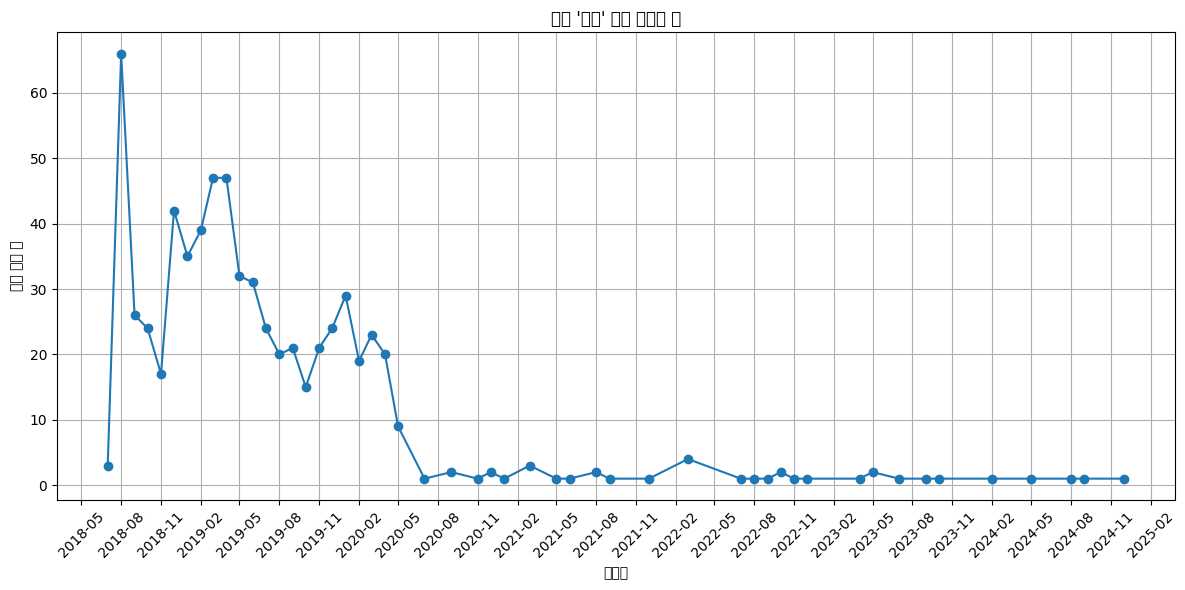

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. 작성월 컬럼 생성
final["작성월"] = final["작성일"].dt.to_period("M").astype(str)

# 2. '학생' 태그 필터링
학생_df = final[final["tag"] == "학생"]

# 3. 월별 개수 계산
학생_월별_카운트 = 학생_df["작성월"].value_counts().sort_index()

# ✅ 4. 월별 개수 출력
print("📊 월별 '학생' 태그 게시물 수:")
print(학생_월별_카운트)

# 5. x축 날짜 형식 변환
x = pd.to_datetime(학생_월별_카운트.index + "-01", format="%Y-%m-%d")
y = 학생_월별_카운트.values

# 6. 시각화
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker="o")

# ✅ x축을 월 단위로 포맷팅
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)


plt.xlabel("작성월")
plt.ylabel("학생 태그 수")
plt.title("월별 '학생' 태그 게시물 수")
plt.grid(True)
plt.tight_layout()
plt.show()


In [369]:
# 신뢰도 낮은 '학생' row 제거
final = final[~((final['tag'] == '학생') & (final['작성일'] < pd.Timestamp("2020-05-01")))]

<ipython-input-370-5486bb601425>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["작성월"] = final["작성일"].dt.to_period("M").astype(str)
<ipython-input-370-5486bb601425>:36: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-370-5486bb601425>:36: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-370-5486bb601425>:36: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-370-5486bb601425>:36: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-370-5486bb601425>:36: User

📊 월별 '학생' 태그 게시물 수:
작성월
2020-05    9
2020-07    1
2020-09    2
2020-11    1
2020-12    2
2021-01    1
2021-03    3
2021-05    1
2021-06    1
2021-08    2
2021-09    1
2021-12    1
2022-03    4
2022-07    1
2022-08    1
2022-09    1
2022-10    2
2022-11    1
2022-12    1
2023-04    1
2023-05    2
2023-07    1
2023-09    1
2023-10    1
2024-02    1
2024-05    1
2024-08    1
2024-09    1
2024-12    1
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

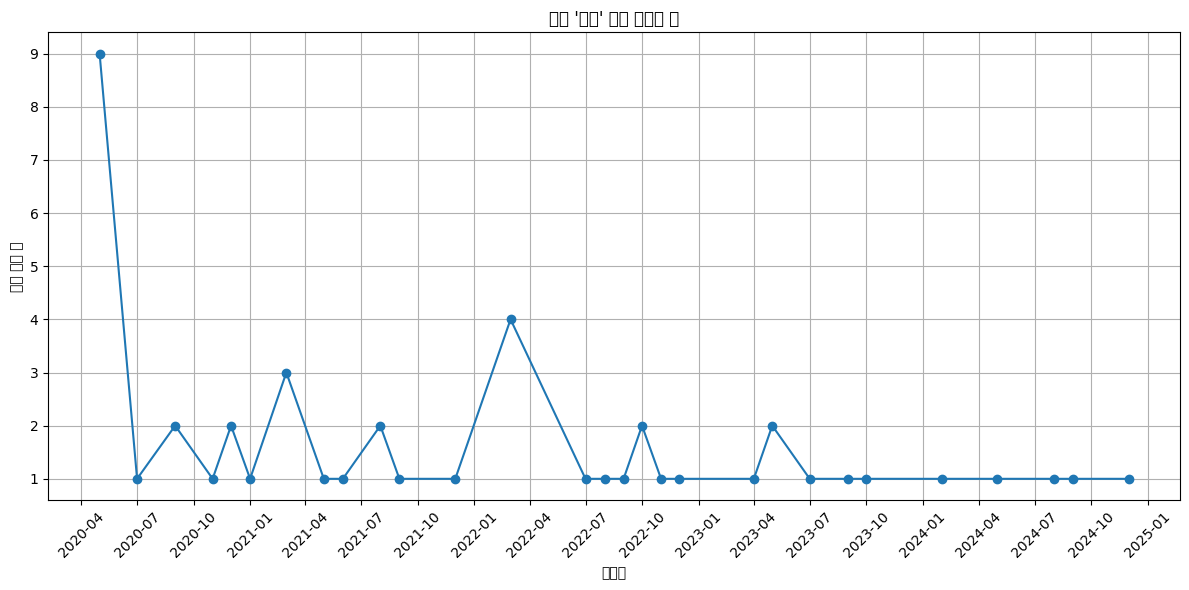

In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. 작성월 컬럼 생성
final["작성월"] = final["작성일"].dt.to_period("M").astype(str)

# 2. '학생' 태그 필터링
학생_df = final[final["tag"] == "학생"]

# 3. 월별 개수 계산
학생_월별_카운트 = 학생_df["작성월"].value_counts().sort_index()

# ✅ 4. 월별 개수 출력
print("📊 월별 '학생' 태그 게시물 수:")
print(학생_월별_카운트)

# 5. x축 날짜 형식 변환
x = pd.to_datetime(학생_월별_카운트.index + "-01", format="%Y-%m-%d")
y = 학생_월별_카운트.values

# 6. 시각화
plt.figure(figsize=(12, 6))
plt.plot(x, y, marker="o")

# ✅ x축을 월 단위로 포맷팅
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)


plt.xlabel("작성월")
plt.ylabel("학생 태그 수")
plt.title("월별 '학생' 태그 게시물 수")
plt.grid(True)
plt.tight_layout()
plt.show()


In [371]:
final['tag'].value_counts()[final['tag'].value_counts() >= 20]

,count
tag,
회계·세무·법무,1234
디자인·CAD,1131
솔루션·SI·CRM·ERP,763
광고·홍보·전시,698
사무·경영지원,626
SW,570
백화점·유통·도소매,454
건설·시공·토목·조경,368
음식료·외식·프랜차이즈,364


In [372]:
final['tag'].value_counts()[final['tag'].value_counts() <= 20].head(50)

,count
tag,
시설관리·보안·경비,18
부동산·중개·임대,17
생활용품·소비재·기타,15
납품·기타,15
경호·기타,15
화물·기타,14
공기업·공공기관,14
비서·기타,13
게임·애니메이션,13


In [373]:
# 30개 미만인 tag들의 리스트 추출
rare_tags = final['tag'].value_counts()
rare_tag_list = rare_tags[rare_tags < 30].index.tolist()

print(rare_tag_list)

['인테리어·자재', '정보보안', '자동차·조선·철강·항공', '사회복지·요양', 'IT·기타', '증권·보험·카드', '포털·컨텐츠·커뮤니티', '네트워크·통신서비스', '시설관리·보안·경비', '부동산·중개·임대', '생활용품·소비재·기타', '납품·기타', '경호·기타', '화물·기타', '공기업·공공기관', '비서·기타', '게임·애니메이션', 'PL·기타', '의료기사·기타', 'IT컨설팅', '캐피탈·대출', '전자·반도체', '식품가공', '모바일·APP', '금속·재료·자재', '컴퓨터·하드웨어·장비', '신문·잡지·언론사', '통번역사·기타', '데이터사이언티스트·기타', '의료(진료과별)', '웹에이전시', '포장·기타', '작가·기타', '생활화학·화장품', '심사·기타', '기타의료종사자·기타', '서비스영업·기타', '컨설턴트·기타', '문화·공연·예술', '컨설팅·연구·조사', '금융사무·기타', '스포츠·여가·레저', '공무·기타', '웨딩·상조·이벤트', '운영보조·기타', '이벤트·기타', '인사·노무·교육', '렌탈·임대·리스', '협회·단체', '법인영업·기타', '설문·기타', '안내데스크·기타', '전기·소방·통신·안전', '목재·제지·가구', '학습지·방문교육', '유아·유치원·어린이집', '경리·회계·결산', 'IT솔루션·SI·ERP', '홀서버·기타', '요리·영양·제과제빵·바리스타', '영양사·기타', 'AI', '크리에이티브디렉터·기타', '영화·음반·배급', '금융·카드', '버스기사·기타', 'IR·공시', '직업상담사·기타', '생산관리·공정관리·품질관리', '기타 기술 시험, 검사 및 분석업', '사회복지·요양보호·자원봉사', '보안·경비·안전', '농축산·어업·임업', '의료(병원분류별)', '부동산·임대·중개', '사서·기타', 'IT교육·학원']


In [381]:
# 1. 매핑 딕셔너리 그대로 사용
mapping_dict = {
    '시설관리·보안·경비' : '안전관리자·기타',
    '부동산·임대·중개' : '부동산·중개·임대',
    '생활용품·소비재·기타' : '백화점·유통·도소매',
    '납품·기타' : '백화점·유통·도소매',
    '경호·기타' : '시설관리자·기타',
    '화물·기타' : '물류·운송·배송',
    '비서·기타' : '경리·기타',
    '게임·애니메이션' : '디자인·CAD',
    'PL·기타' : '사무·경영지원',
    '의료기사·기타' : '의료(간호·원무·상담)',
    '캐피탈·대출' : '은행·금융',
    'IT컨설팅' : '사무·경영지원',
    '전자·반도체' : '반도체·디스플레이·광학',
    '식품가공' : '음식료·외식·프랜차이즈',
    '모바일·APP' : 'SW',
    '금속·재료·자재' : '기계·기계설비',
    '데이터사이언티스트·기타' : 'SW',
    '신문·잡지·언론사' : '출판·인쇄·사진',
    '통번역사·기타' : '경리·기타',
    '컴퓨터·하드웨어·장비' : '전기·전자·제어',
    '의료(진료과별)' : '의료(간호·원무·상담)',
    '웹에이전시' : '콜센터·아웃소싱·기타',
    '포장·기타' : '백화점·유통·도소매',
    '작가·기타' : '출판·인쇄·사진',
    '생활화학·화장품' : '뷰티·미용',
    '심사·기타' : '사무·경영지원',
    '기타의료종사자·기타' : '의료(간호·원무·상담)',
    '서비스영업·기타' : '영업관리·기타',
    '문화·공연·예술' : '연예·엔터테인먼트',
    '컨설턴트·기타' : '솔루션·SI·CRM·ERP',
    '컨설팅·연구·조사' : '솔루션·SI·CRM·ERP',
    '금융사무·기타' : '은행·금융',
    '스포츠·여가·레저' : '연예·엔터테인먼트',
    '공무·기타' : '공기업·공공기관',
    '웨딩·상조·이벤트' : '연예·엔터테인먼트',
    '운영보조·기타' : '경리·기타',
    '이벤트·기타' : '연예·엔터테인먼트',
    '인사·노무·교육' : '사무·경영지원',
    '렌탈·임대·리스' : '백화점·유통·도소매',
    '협회·단체' : '공기업·공공기관',
    '법인영업·기타' : '회계·세무·법무',
    '설문·기타' : '포털·컨텐츠·커뮤니티',
    '안내데스크·기타' : '경리·기타',
    '전기·소방·통신·안전' : '건축·설비·환경',
    '목재·제지·가구' : '생산·제조',
    '유아·유치원·어린이집' : '학교(초·중·고·대학·특수)',
    '학습지·방문교육' : '학원·어학원·교육원',
    '경리·회계·결산' : '경리·기타',
    'IT솔루션·SI·ERP' : '솔루션·SI·CRM·ERP',
    '홀서버·기타' : 	"음식료·외식·프랜차이즈",
     '요리·영양·제과제빵·바리스타' : "음식료·외식·프랜차이즈",
    '영양사·기타' : "음식료·외식·프랜차이즈",
    "금융·카드" : "은행·금융",
      "AI" : "SW",
    "영화·음반·배급" : "연예·엔터테인먼트",
    "크리에이티브디렉터·기타" : "연예·엔터테인먼트",
    "IR·공시" :	"사무·경영지원",
    "버스기사·기타" :  "물류·운송·배송",
    "생산관리·공정관리·품질관리" :	"물류관리자·기타",
    "직업상담사·기타" :	"서치펌·헤드헌팅",
    "사회복지·요양보호·자원봉사" :	'사회복지·요양',
    "기타 기술 시험, 검사 및 분석업" :	"솔루션·SI·CRM·ERP",
    "농축산·어업·임업" : "음식료·외식·프랜차이즈",
    "보안·경비·안전" : "시설관리자·기타",
    "의료(병원분류별)" : "의료(간호·원무·상담)",
    "사서·기타" : '공기업·공공기관',
   "IT교육·학원" : "학원·어학원·교육원",
    "증권·보험·카드" : "은행·금융",
    "IT·기타" : "SW",
    "쇼핑몰·오픈마켓·소셜커머스" : "백화점·유통·도소매",
    "무역·상사" : "무역·물류·배송",
    "물류·운송·배송" : "무역·물류·배송",
    "물류관리자·기타" : "무역·물류·배송",
    "안전관리자" : "시설·안전관리자",
    "시설관리자" : "시설·안전관리자",
    "학교(초·중·고·대학·특수)" : "교육",
    "학원·어학원·교육원" : "교육",
    "경리·기타" : "사무·경영지원",
    "제과제빵사·기타" : "음식료·외식·프랜차이즈",
    "반도체·디스플레이·광학" : "전자·기계",
    "기계·기계설비" : "전자·기계",
    "전기·전자·제어" : "전자·기계",
    "건설·시공·토목·조경" : "건축·설비",
    "건축·설비·환경" : "건축·설비"

}

# 2. 기존 tag 컬럼을 매핑된 값으로 덮어쓰기
final['tag'] = final['tag'].map(mapping_dict).fillna(final['tag'])

# 3. 확인
print("✅ 기존 'tag' 컬럼이 매핑된 값으로 성공적으로 대체되었습니다!")


✅ 기존 'tag' 컬럼이 매핑된 값으로 성공적으로 대체되었습니다!


In [382]:
final['tag'].value_counts()[final['tag'].value_counts() <= 20].head(1000)

,count
tag,
부동산·중개·임대,18


In [383]:
final[final['tag'] == ""]

,post_id,제목,내용,태그,작성일,해시태그,이직_원인_후보,TFIDF_키워드,이직확률,tag,작성월


In [384]:
# 30개 미만인 tag들의 리스트 추출
rare_tags = final['tag'].value_counts()
rare_tag_list = rare_tags[rare_tags < 18].index.tolist()

print(rare_tag_list)

[]


In [385]:
final['tag'].value_counts()

,count
tag,
회계·세무·법무,1237
디자인·CAD,1144
솔루션·SI·CRM·ERP,779
사무·경영지원,730
광고·홍보·전시,698
SW,617
건축·설비,614
백화점·유통·도소매,529
무역·물류·배송,502


In [386]:
# 1. '태그', '작성월' 컬럼 삭제
final_dropped = final.drop(columns=["태그", "작성월"], errors="ignore")

# 2. CSV 파일로 저장
final_dropped.to_csv("직업_추가.csv", index=False, encoding="utf-8-sig")

In [380]:
# 3. 조건: '학생' 태그 & 2020년 5월 1일 이전 작성
filtered_students = final[
    (final["tag"] == "학생") &
    (final["작성일"] < pd.Timestamp("2020-05-01"))
]

# 4. TF-IDF 키워드만 추출
student_tfidf_df = filtered_students[["post_id", "TFIDF_키워드"]]

# 5. 출력
print(f"총 추출된 row 수: {len(student_tfidf_df)}")
print(student_tfidf_df.head())



총 추출된 row 수: 0
Empty DataFrame
Columns: [post_id, TFIDF_키워드]
Index: []
